
# Medical Appointment No Show DataSet Investigation

## Introduction

**A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?**
 
The high rate of people not showing up for their appointment despite the basic amenities provided is quite alarming. So this analysis is based on People why people doesn't show up for their medical appointment.The dataset used for this analysis is gotten from "kaggle" , It consists of more than 110k rows and 14 columns, gotten from May 2016 to June 2016.
The columns includes "PatientId", "AppointmentID",	"Gender", "ScheduledDay", "AppointmentDay",	"Age", "Neighbourhood",	"Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap",	"SMS_received",	"No-show".

Here, we can see the "No-show" column is the target variable, and also the dataset is a classification problem.





## Questions

In this analysis, we did be looking into the following questions:


* What is the percentage of people who shows up for the appointment and those who didn't?
* What is the age range of people who didn't show up?
* Does sending of SMS has any impact on people showing up and those who didn't?
* Does Scholarship has any impact on people showing up and those who didn't?
* Does Neighbourhood has any impact on people showing up and those who didn't?
* Does difference in the scheduled date and appointment date has any impact on people showing up and those who didn't?
* What factor affect people not showimg up for their scheduled appoinment?.

## Data Wrangling

In [1]:
# Importation of necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in file
noShow = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') 


In [3]:
 noShow.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [4]:
#shape
noShow.shape

(110527, 14)

Here we can see the dataset consists of 110527 rows and 14 columns

In [5]:
# info
noShow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset had different columns with different data types, also we can see columns like **ScheduledDay**, **AppointmentDay** has the wrong datatypes, Columns like **Hipertension**, **Handcap** are mis-spealt also **No-show** should be **No_show**

In [6]:
# Changing ScheduledDay and AppointmentDayto DateTime 
noShow['ScheduledDay'] = pd.to_datetime(noShow['ScheduledDay'], format= '%Y-%m-%d %H:%M:%S')
noShow['AppointmentDay'] = pd.to_datetime(noShow['AppointmentDay'], format= '%Y-%m-%d %H:%M:%S')

I converted the ScheduleDay and AppointmentDay columns from object to datetime which is the appropriate datatype for it

In [7]:
#replace spaces with underscores 
noShow.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)

In [8]:
#Changing the names that are mis-spelt
noShow.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace = True)

In [9]:
noShow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

Now re-checking the info, we can see that all the datatypes and columns spellings are now in place.

In [10]:
# checking for null values
noShow.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No_show           0
dtype: int64

After that,I checked for the missing values and we can see the dataset has no null values

In [11]:
noShow.duplicated().value_counts()

False    110527
dtype: int64

Checking for duplicate values, There are no duplicate values.

In [12]:
noShow.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hypertension       Diabetes     Alcoholism       Handicap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

Checking at the Age column, I noticed there are some outliers there, The age is having a minimum of -1, which is quite untrue for human age. So, we did be looking into that.

<AxesSubplot:xlabel='Age'>

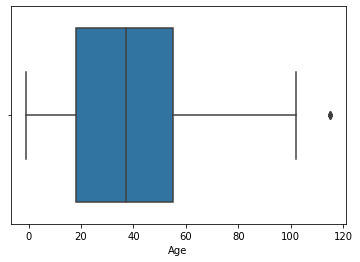

In [13]:
sns.boxplot(noShow['Age'])

In [14]:
noShow.query('Age == -1')

PatientId  AppointmentID Gender              ScheduledDay  \
99832  4.659432e+14        5775010      F 2016-06-06 08:58:13+00:00   

                 AppointmentDay  Age Neighbourhood  Scholarship  Hypertension  \
99832 2016-06-06 00:00:00+00:00   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handicap  SMS_received No_show  
99832         0           0         0             0      No

Since we have just one row -1 as the age, it did be best to drop the row

In [15]:
noShow.drop(noShow.query('Age == -1').index, inplace = True)
noShow.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105260e+05   1.105260e+05  110526.000000  110526.000000   
mean   1.474934e+14   5.675304e+06      37.089219       0.098266   
std    2.560943e+14   7.129544e+04      23.110026       0.297676   
min    3.921784e+04   5.030230e+06       0.000000       0.000000   
25%    4.172536e+12   5.640285e+06      18.000000       0.000000   
50%    3.173184e+13   5.680572e+06      37.000000       0.000000   
75%    9.438963e+13   5.725523e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hypertension       Diabetes     Alcoholism       Handicap  \
count  110526.000000  110526.000000  110526.000000  110526.000000   
mean        0.197248       0.071865       0.030400       0.022248   
std         0.397923       0.258266       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110526.000000  
mean        0.321029  
std         0.466874  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

### Question 1
What is the percentage of people who shows up for the appointment and those who didn't?

## Exploratory Data Analysis

In [16]:
noShow['No_show'].value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

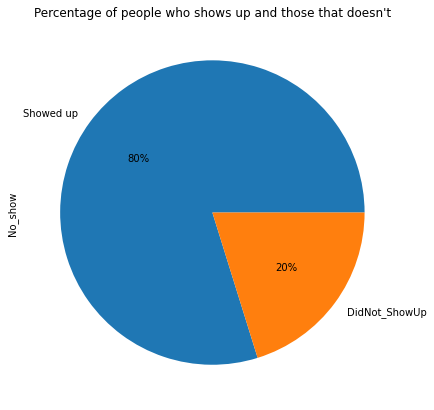

In [17]:
noShow['No_show'].value_counts().plot(kind = 'pie', labels = ['Showed up', 'DidNot_ShowUp'], autopct = '%1.0f%%', figsize = (10,7));
plt.title("Percentage of people who shows up and those that doesn't");

To check for the percentage of people who showed up and those that didn't, Firstly, I checked for the value count and realize that we have higher values of people who showed up for the appointment to those who doesn't and later visualize the percentage using a pie chart.
People who showed up are those with **No** with a value count of 88207 and percentage of 80% while those who doesn't show up are those with **yes** with a value count of 22319 and percentage of 20%.

So the question now is -- Why didn't those people show up?

### Question 2

What is the age range of people who didn't show up?

In [18]:
noShow['Age_range'] = pd.cut(x = noShow['Age'], bins = [0, 20, 40, 60, 80, 100, 120])
noShow['Age_range']

0         (60, 80]
1         (40, 60]
2         (60, 80]
3          (0, 20]
4         (40, 60]
            ...   
110522    (40, 60]
110523    (40, 60]
110524    (20, 40]
110525    (20, 40]
110526    (40, 60]
Name: Age_range, Length: 110526, dtype: category
Categories (6, interval[int64]): [(0, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 100] < (100, 120]]

In [19]:
count = noShow.groupby(['Age_range'])['No_show'].value_counts()
count

Age_range   No_show
(0, 20]     No         21852
            Yes         6457
(20, 40]    No         22209
            Yes         6626
(40, 60]    No         24490
            Yes         5591
(60, 80]    No         14373
            Yes         2537
(80, 100]   No          2379
            Yes          466
(100, 120]  No             4
            Yes            3
Name: No_show, dtype: int64

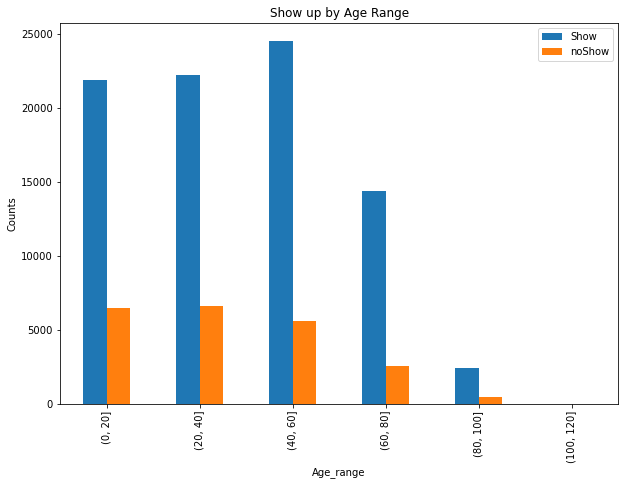

In [20]:
noShow.groupby(['Age_range'])['No_show'].value_counts().unstack().plot(kind = 'bar', figsize = (10,7))
plt.legend(['Show','noShow'])
plt.ylabel('Counts')
plt.title("Show up by Age Range");

Here, we can see that most people who shows up are between the range 40 and 60 while most peope sho didn't show up are between the range 20 and 40

### Question 3
Does sending of SMS has any impact on people showing up and those who didn't?

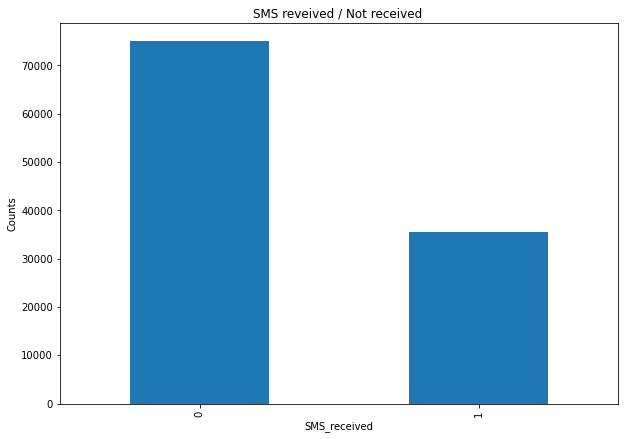

In [21]:
counts  = noShow['SMS_received'].value_counts()
counts.plot(kind = 'bar',figsize = (10,7))
plt.title('SMS reveived / Not received ')
plt.xlabel('SMS_received')
plt.ylabel('Counts');

Here, we can see we have higher percentage of people who don't receive SMS

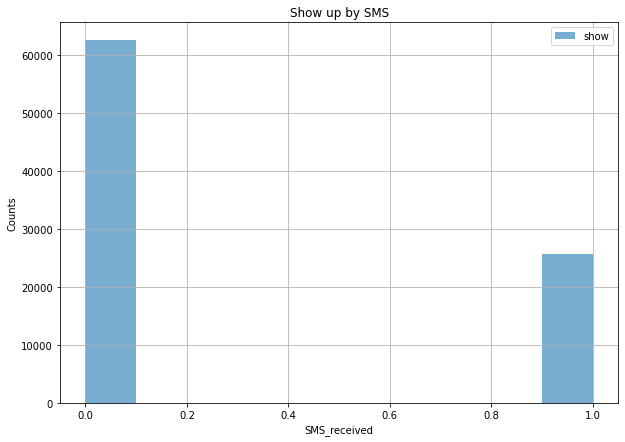

In [22]:
no_show = noShow.No_show == "Yes"
show = noShow.No_show == "No"

noShow.SMS_received[show].hist(alpha = 0.6, label = 'show', figsize = (10,7));
plt.xlabel('SMS_received')
plt.ylabel('Counts')
plt.title("Show up by SMS");
plt.legend();

So, I checked for the people who showed up for their appointment and realized that more of people who showed up are those who did not receive an SMS.
Therefore, we can infer that SMS doesn't really have an impact in people showing up or not.

### Question 4
Does Scholarship has any impact on people showing up and those who didn't?

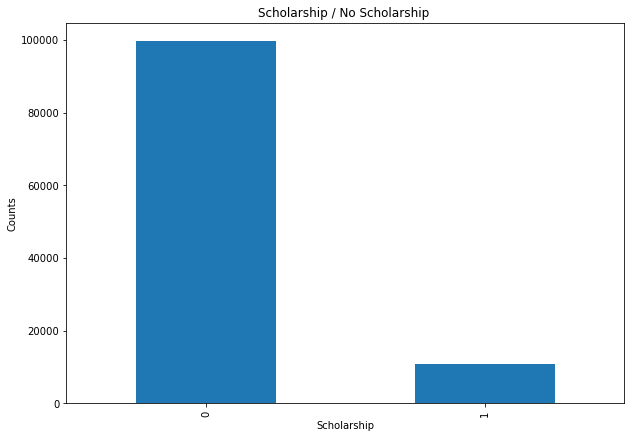

In [23]:
counts  = noShow['Scholarship'].value_counts()
counts.plot(kind = 'bar',figsize = (10,7))
plt.title('Scholarship / No Scholarship ')
plt.xlabel('Scholarship')
plt.ylabel('Counts');

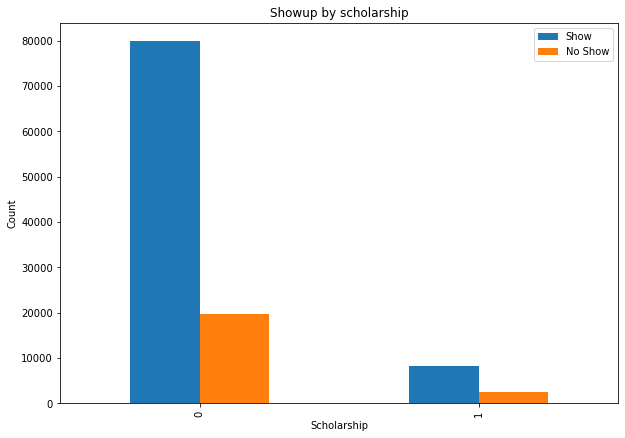

In [24]:
(noShow.groupby('Scholarship')['No_show'].value_counts().unstack()).plot(kind = 'bar', figsize = (10,7)).plot(kind = 'barh', figsize = (10,7))
plt.title("Showup by scholarship")
plt.legend(['Show','No Show'])
plt.ylabel('Count')
plt.xlabel('Scholarship');

We can see there is higher percentage of people who didn't receive the scholarship to people who receive it . From the graph above, we can say people who didn't receive the scholarship shows up more than people who received it.
Therefore, Scholarship didn't have impact in people showing up or not.

### Question 5
Does Neighbourhood has any impact on people showing up and those who didn't?

In [25]:
noShow['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

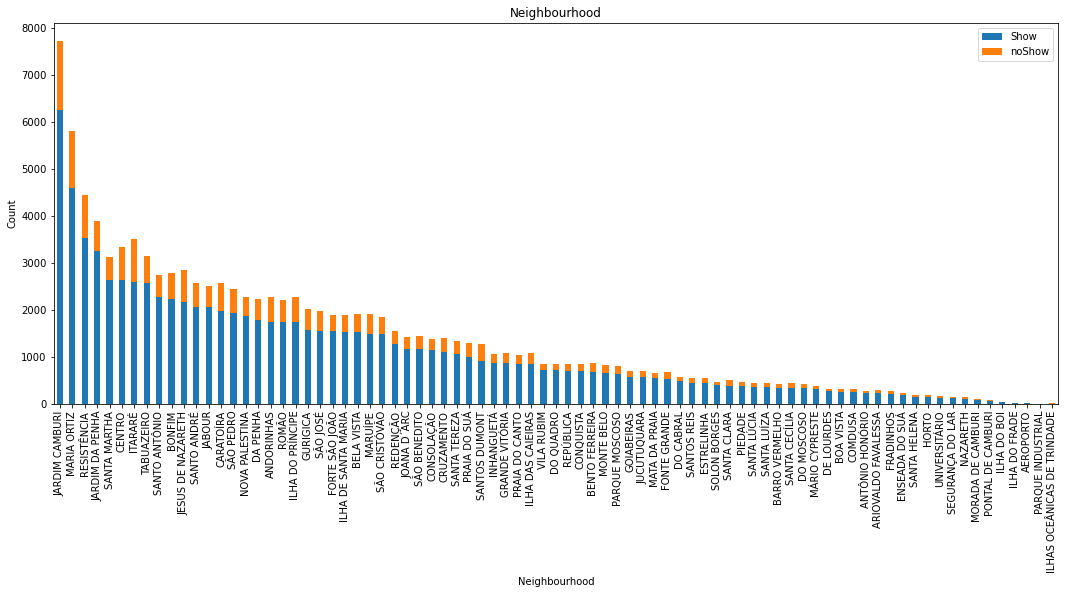

In [26]:
noShowg = noShow.groupby(['Neighbourhood'])['No_show'].value_counts().unstack().sort_values(by = 'No',ascending = False)

noShowg.plot(kind='bar', title='Neighbourhood', stacked = True, figsize = (18,7))
plt.ylabel('Count')
plt.legend(['Show','noShow']);

Here I checked for the showup based on the neighbourhood and can infer that 'JARDIM CAMBURI' has the highest countd while  'PARQUE INDUSTRIAL' has the least. Basically, this feature can't really be used to determine people showing up for their appointment or not since we don't know the distance between where the people lives and the the hospital location.


### Question 6
Does difference in the scheduled date and appointment date has any impact on people showing up and those who didn't?

In [27]:
noShow['AppointmentDate'] = [d.date() for d in noShow['AppointmentDay']]
noShow['AppointmentTime'] = [d.time() for d in noShow['AppointmentDay']]

noShow['ScheduledDate'] = [d.date() for d in noShow['ScheduledDay']]
noShow['ScheduledTime'] = [d.time() for d in noShow['ScheduledDay']]


In [28]:
noShow['Difference'] = (noShow['AppointmentDate'] - noShow['ScheduledDate'])
noShow['Difference']

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Name: Difference, Length: 110526, dtype: timedelta64[ns]

In [29]:
noShow['Day_Difference'] = (noShow['Difference']).dt.days

In [30]:
noShow['Day_Difference']

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: Day_Difference, Length: 110526, dtype: int64

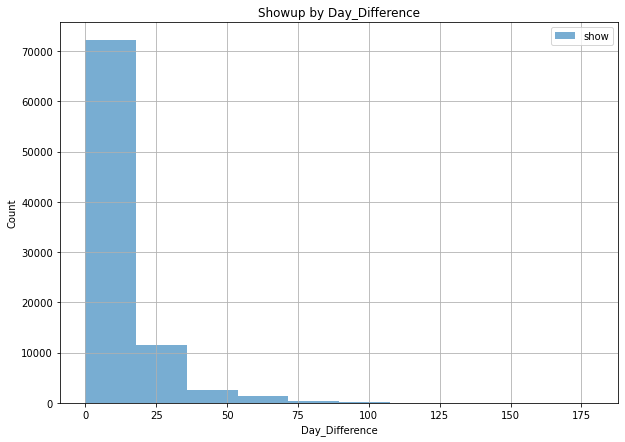

In [31]:
noShow.Day_Difference[show].hist(alpha = 0.6, label = 'show', figsize = (10,7))
plt.legend();
plt.ylabel('Count')
plt.xlabel('Day_Difference')
plt.title("Showup by Day_Difference");

To get the difference between the scheduled date and the appointment date, Firstly, I extract the days from the dates of both columns then remove the string beside it.
After that I then visualize the people who showed up for their by their Day_difference  and discovered that most people who showed up have small Day Difference.

**What factor affect people not showimg up for their scheduled appoinment?**

So, we can say Day Differnce has a huge impact in people showing up for their appointment.

## Conclusion

* We have higher range of people showing up for the appointment to people who didn't show up
* Here, we can see that most people who shows up are between the range 40 and 60 while most peope sho didn't show up are between the range 20 and 40.
* For the people who showed up for their appointment and realized that more of people who showed up are those who did not receive an SMS. Therefore, we can infer that SMS doesn't really have an impact in people showing up or not.
* we can see there is higher percentage of people who didn't receive the scholarship to people who receive it . Also, there isn't much impart of the scholarship with people who showed for the appointment or not.
* 'JARDIM CAMBURI' has the highest countd while 'PARQUE INDUSTRIAL' has the least
* people whose appointment and schedule difference in is small has higher chance of showing up to people whose difference is much.
* Overall,The difference between the Appointment and schedule date  has the most impact in people showing up and people not showing up



## Limitations

* Since there is a larger number of people who show up to people who didn't in the dataset, we can say the dataset is a bit biased
* More information should also be given on the closeness of the patients to the hospital(neighbourhood)
